In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import cv2

In [5]:
from glob import glob
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

In [20]:
image_size = (256,256,3)
train_path = 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train'
valid_path = 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/val'

In [27]:
inception = InceptionV3(input_shape=image_size,weights='imagenet',include_top=False)

In [28]:
for layer in inception.layers:
    layer.trainable = False

In [29]:
folders = glob('C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train/*')

In [30]:
folders

['C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Early_blight',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___healthy',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Late_blight',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Septoria_leaf_spot',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Target_Spot',
 'C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [31]:
len(folders)

6

In [32]:

number_of_classes = 6

# Create a new instance of the InceptionV3 model
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

# Define the new model
model = Sequential()

# Add the InceptionV3 module to the model
model.add(inception)

# Flatten the output of the InceptionV3 module
model.add(Flatten())

# Add fully connected layers with ReLU activation functions
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

# Add the output layer with a softmax activation function
model.add(Dense(number_of_classes, activation='softmax'))

# Print a summary of the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)              75498496  
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 97,958,950
Trainable params: 97,924,518


In [33]:
# model.summary()

In [34]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
training_set = train_datagen.flow_from_directory('C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/train',
target_size=(256,256),
batch_size= 32,
class_mode='categorical')

Found 6000 images belonging to 6 classes.


In [39]:
test_set = test_datagen.flow_from_directory('C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/val',
target_size=(256,256),
batch_size= 32,
class_mode='categorical')

Found 600 images belonging to 6 classes.


In [40]:
history = model.fit(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/10


KeyboardInterrupt: 

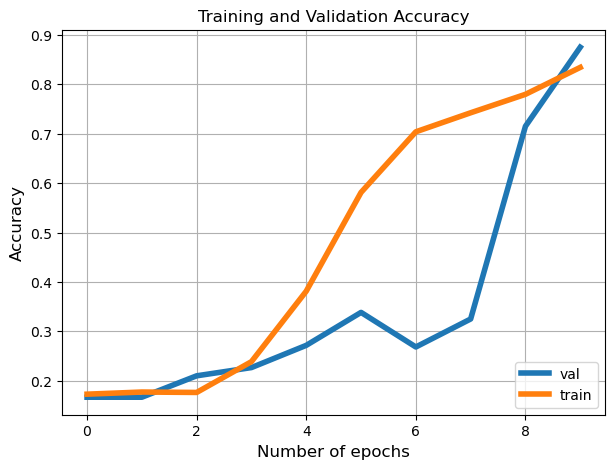

In [16]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

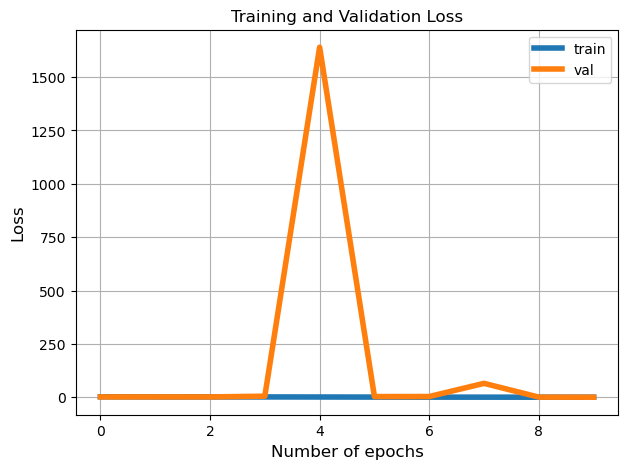

In [17]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()

In [18]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

In [1]:
img_test = cv2.imread('C:/Users/Dell/Desktop/1/dataset/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1d389f4a-ac40-4233-8b73-5bbf4428fda2___UF.GRC_YLCV_Lab 01279.JPG')
img_resize = cv2.resize(img_test,(256,256))
plt.imshow(mpimg.imread('C:/Users/Dell/Desktop/1/dataset/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1d389f4a-ac40-4233-8b73-5bbf4428fda2___UF.GRC_YLCV_Lab 01279.JPG'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,256,256,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)


if input_label == 0:
    print("Early_blight")
elif input_label == 1:
    print("Healthy")
elif input_label == 2:
    print("Late_blight")
elif input_label == 3:
    print("Septoria_leaf_spot")
elif input_label == 4:
    print("Target_Spot")
elif input_label == 5:
    print("Tomato_Yellow_Leaf_Curl_Virus")

NameError: name 'cv2' is not defined

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_5/inception_v3/activation_940/Relu' defined at (most recent call last):
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Dell\AppData\Local\Temp\ipykernel_4012\2027632788.py", line 32, in <module>
      input_pred = model.predict(img_test_augmented)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\layers\core\activation.py", line 59, in call
      return self.activation(inputs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential_5/inception_v3/activation_940/Relu'
convolution input must be 4-dimensional: [32,256,3]
	 [[{{node sequential_5/inception_v3/activation_940/Relu}}]] [Op:__inference_predict_function_187930]

TypeError: argument 1 must be sequence of length 2, not 3

In [2]:
import cv2
import numpy as np

# Define the size of the input images
image_size = (256, 256)

# Define the rescaling factor
rescale_factor = 1./255

# Load the image
img_test = cv2.imread('C:/Users/Dell/Desktop/Tomato Leaf disease detection/dataset/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1d389f4a-ac40-4233-8b73-5bbf4428fda2___UF.GRC_YLCV_Lab 01279.JPG')

# Resize and rescale the image
if len(image_size) == 2:
    img_test = cv2.resize(img_test, image_size)
else:
    img_test = cv2.resize(img_test, image_size[:-1])
img_test = img_test.astype('float32') * rescale_factor

# Reshape the image for the model
img_reshaped = np.expand_dims(img_test, axis=0)

# Predict the label
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)

# Print the label
if input_label == 0:
    print("Early_blight")
elif input_label == 1:
    print("Healthy")
elif input_label == 2:
    print("Late_blight")
elif input_label == 3:
    print("Septoria_leaf_spot")
elif input_label == 4:
    print("Target_Spot")
elif input_label == 5:
    print("Tomato_Yellow_Leaf_Curl_Virus")


NameError: name 'model' is not defined